# LSTM Para correos de spam

Una Red Neuronal de Memoria a Largo y Corto Plazo (LSTM) es una arquitectura de red neuronal recurrente diseñada específicamente para aprender dependencias a largo plazo en secuencias de datos. En el contexto de la clasificación de correos electrónicos como spam o no spam, las LSTMs son particularmente útiles debido a su capacidad para procesar y hacer predicciones basadas en la secuencia completa de palabras en el texto de un correo electrónico.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import shap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout

# Visualización de Resultados
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/combined_data.csv')

data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
X = data['text'].astype(str)  
y = data['label']

In [5]:
# Configura el Tokenizer y convierte los textos a secuencias
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [6]:
# Aplica padding a las secuencias
X_padded = pad_sequences(sequences, maxlen=5000)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.25, random_state=42)

In [7]:
train_sequences = X_train 
size = len(tokenizer.word_index) + 1
seq_len = max([len(seq) for seq in train_sequences])

In [8]:
model = Sequential()

model.add(Embedding(input_dim=size, output_dim=50, input_length=seq_len))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/Caskroom/miniforge/base/envs/ML/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2736s 7s/step - accuracy: 0.8850 - loss: 0.2764 - val_accuracy: 0.9798 - val_loss: 0.0690
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2741s 7s/step - accuracy: 0.9852 - loss: 0.0500 - val_accuracy: 0.9827 - val_loss: 0.0774
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2766s 7s/step - accuracy: 0.9904 - loss: 0.0355 - val_accuracy: 0.9291 - val_loss: 0.1815
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2681s 7s/step - accuracy: 0.9730 - loss: 0.0744 - val_accuracy: 0.9748 - val_loss: 0.0741
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3081s 8s/step - accuracy: 0.9920 - loss: 0.0259 - val_accuracy: 0.9829 - val_loss: 0.0574
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2744s 7s/step - accuracy: 0.9966 - loss: 0.0134 - val_accuracy: 0.9838 - val_loss: 0.0632
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2765s 7s/step - accuracy: 0.9967 - loss: 0.0111 - val_accuracy: 0.9836 - val_loss: 0.0724
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2725s 7s/step - accuracy: 0.9977 - loss: 0.0077 - 

In [10]:
# Evaluación del modelo
results = model.evaluate(X_val, y_val)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

652/652 ━━━━━━━━━━━━━━━━━━━━ 402s 616ms/step - accuracy: 0.9860 - loss: 0.0751
Test Loss: 0.08011943846940994, Test Accuracy: 0.9858115315437317


Los resultados obtenidos del modelo son muy buenos con un Test Accuracy de 0.9858 y un Test Loss de 0.080. Seguidamente se muestra un gráfico con todas las epochs entrenadas.

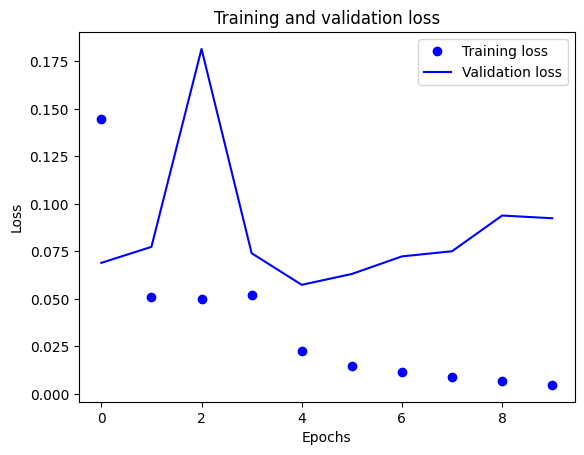

In [ ]:
# Gráfico de la pérdida
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

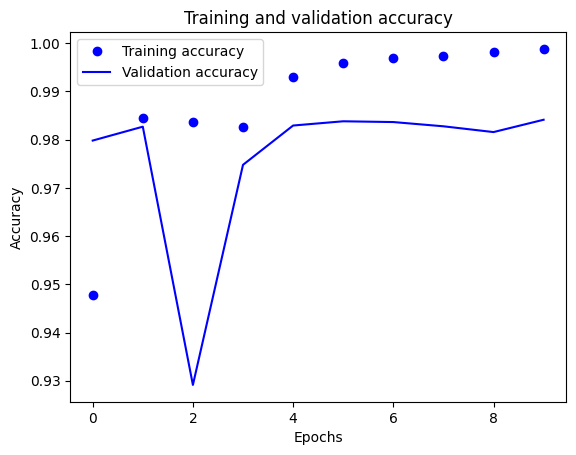

In [12]:
# Gráfico de la precisión
plt.plot(history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Variables importantes

Debido a la gran cantidad de datos calcular las variables importantes del X_val (20,862 registros) el calculo de tiempo estimado en entrenarse es de aproximadamente 1490 horas. Por ello, se intentó seleccionar un conjunto menor de horas. Esto tampoco funcionó ya que el tiempo de ejecución era demasiado largo.

In [16]:
# Determina el tamaño del subconjunto como un porcentaje del total (e.g., 10%)
subset_size = int(0.01 * len(X_val))  # Cambia 0.1 a la fracción deseada

# Genera índices aleatorios
indices = np.random.choice(len(X_val), subset_size, replace=False)

# Selecciona el subconjunto usando los índices
X_val_subset = X_val[indices]

In [ ]:
explainer = shap.Explainer(model.predict, X_val_subset)

shap_values = explainer(X_val_subset, max_evals=10001)

shap.plots.waterfall(shap_values[0])

Una vez analizados los tres modelos se puede observar que LSTM es el segundo mejor modelo, obteniendo unos resultados muy buenos de Test Accuracy: 0.9858 y Test Loss: 0.080.